In [ ]:
## Mode 1: Automatic AI vs. Random Word

# This mode simulates the AI playing against a randomly chosen target word from `words.txt`. It uses the `test_highestFrequency` function from `main.py` (which we import as `gameEngine`).

# Change the number inside `run_ai_simulation()` to run more simulations (e.g., `run_ai_simulation(10)`).

In [ ]:
import main as gameEngine
import random

print("Running 1 automatic game simulation...")
gameEngine.run_ai_simulation(1)

print("\nSimulation complete.")

In [ ]:
# ## Mode 2: AI vs. User-Defined Word

# In this mode, you provide a specific 5-letter target word (which must be a valid potential answer from `words.txt`), and the AI will attempt to guess it.

In [ ]:
import main as gameEngine
import random
import math

user_target = input("Enter the 5-letter target word (must be in words.txt): ")
gameEngine.solve_specific_word(user_target)

In [ ]:
## Mode 3: Human VS AI Wordle

In [ ]:
import main as gameEngine
import random
import math

gameEngine.play_human_vs_ai()

Choose difficulty (easy/hard):  easy



--- Human vs AI Wordle ---
Difficulty: Easy

--- Turn 1 ---


Your guess (1/6):  adieu


Your result: 🟨⬛⬛⬛⬛
AI is thinking...
AI guess (1/6): salet -> 🟩🟨🟨⬛⬛

--- Turn 2 ---


In [ ]:
## Mode 4: Wordle Helper AI

In [ ]:
import main as gameEngine
import random
import math
import re

gameEngine.play_ai_helper_mode()

## Full Simulation & Histogram

This mode runs the solver against **every single word** in `words.txt` to generate a complete performance profile.

It then plots a histogram showing the distribution of guesses required (1, 2, 3, 4, 5, 6, or DNF for failures).

**Warning:** This will take some time to run! There are 2,315 words in `words.txt`. Depending on your computer, expect it to take a few minutes.

Starting full simulation for all words in words.txt...
This may take several minutes. (2315 words)
... processed 200/2315 words ...
... processed 400/2315 words ...
... processed 600/2315 words ...
... processed 800/2315 words ...
... processed 1000/2315 words ...
... processed 1200/2315 words ...
... processed 1400/2315 words ...
... processed 1600/2315 words ...
... processed 1800/2315 words ...
... processed 2000/2315 words ...
... processed 2200/2315 words ...

Simulation complete. Processed 2315 words in 493.35 seconds.
Generating histogram...
--- Overall Stats ---
Total Games: 2315
Success Rate: 100.00%
Failed Games (DNF): 0
Average Steps (on success): 3.5378

Distribution of Guesses:
  1 Steps: 0 games
  2 Steps: 108 games
  3 Steps: 954 games
  4 Steps: 1158 games
  5 Steps: 90 games
  6 Steps: 5 games
  DNF (7): 0 games

Displaying plot...


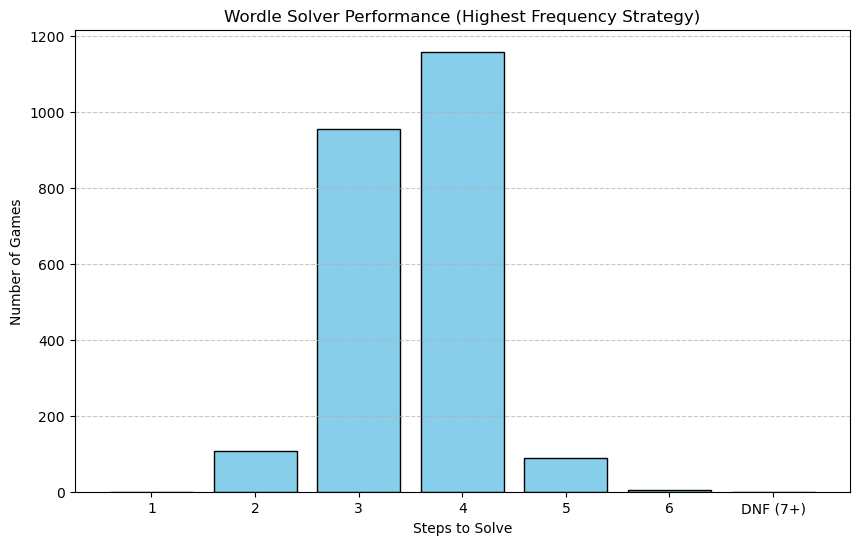

In [1]:
import main as gameEngine
import matplotlib.pyplot as plt
import numpy as np
import time
import math

%matplotlib inline

gameEngine.run_full_simulation_and_plot()